# import libraries

In [1]:
# !pip install pingouin
# !pip install openpyxl
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.weightstats import DescrStatsW
import pandas as pd
import pingouin as pg
from statsmodels.stats.weightstats import DescrStatsW

In [39]:

def bland_altman_plot(manual_counts, model_predictions, title="Bland–Altman Plot"):
    """
    Generate a Bland–Altman plot and calculate bias with confidence intervals (CI95%).

    Parameters:
    - manual_counts: Array of manual counts (ground truth).
    - model_predictions: Array of model predictions.
    - title: Title of the plot.
    """
    # Calculate mean and differences
    avg = (manual_counts + model_predictions) / 2.0
    diff = manual_counts - model_predictions
    bias = np.mean(diff)
    std_diff = np.std(diff, ddof=1)

    # Calculate CI95% for bias
    n = len(diff)
    ci95_lower = bias - 1.96 * (std_diff / np.sqrt(n))
    ci95_upper = bias + 1.96 * (std_diff / np.sqrt(n))

    # Plotting
    plt.figure(figsize=(8, 6))
    plt.scatter(avg, diff, color="blue", alpha=0.6, label="Differences")
    plt.axhline(bias, color="red", linestyle="--", label=f"Bias: {bias:.2f}")
    plt.axhline(ci95_lower, color="green", linestyle="--", label=f"CI95%: [{ci95_lower:.2f}, {ci95_upper:.2f}]")
    plt.axhline(ci95_upper, color="green", linestyle="--")
    plt.xlabel("Average of Manual and Model Counts")
    plt.ylabel("Difference (Manual - Model)")
    plt.title(title)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

    # Print results
    print(f"Bias: {bias:.2f}")
    print(f"CI95%: [{ci95_lower:.2f}, {ci95_upper:.2f}]")


# Sample

In [2]:


# Example data (replace with your actual data)
data = {
    'Image': [1, 2, 3],
    'Ground Truth': [45, 32, 60],
    'Model 1 Prediction': [44, 31, 59],
    'Model 2 Prediction': [46, 33, 61],
    'Model 3 Prediction': [43, 34, 62]
}
df = pd.DataFrame(data)

# Melt the data for ICC calculation
df_melted = df.melt(id_vars='Image', var_name='Rater', value_name='Score')

# Calculate ICC
icc = pg.intraclass_corr(data=df_melted, targets='Image', raters='Rater', ratings='Score')

# Show ICC results
print(icc)


    Type              Description       ICC      F  df1  df2          pval  \
0   ICC1   Single raters absolute  0.991607  473.6    2    9  7.614159e-10   
1   ICC2     Single random raters  0.991611  592.0    2    6  1.281778e-07   
2   ICC3      Single fixed raters  0.993277  592.0    2    6  1.281778e-07   
3  ICC1k  Average raters absolute  0.997889  473.6    2    9  7.614159e-10   
4  ICC2k    Average random raters  0.997889  592.0    2    6  1.281778e-07   
5  ICC3k     Average fixed raters  0.998311  592.0    2    6  1.281778e-07   

         CI95%  
0  [0.95, 1.0]  
1  [0.95, 1.0]  
2  [0.95, 1.0]  
3  [0.99, 1.0]  
4  [0.99, 1.0]  
5  [0.99, 1.0]  


# read datasets

In [4]:
address= 'C:/Users/narges/PycharmProjects3/pythonProject3/IEEE_transaction_paper/all_methodology_comparings/'
file_name= ['compare_local_maxima_real_synth_lightunet_unet.xlsx' , 'compare_cca_real_synth_unet_light_unet.xlsx' , 'compare_Watershed1_synth_real_unet_lightunet.xlsx']
data_local_maxima= pd.read_excel(address+ file_name[0])
data_cca= pd.read_excel(address+ file_name[1])
data_watershed= pd.read_excel(address+ file_name[2])


# light unet real CCI

In [7]:
images_name= data_local_maxima.iloc[1:,0].dropna()
ground_truths=data_local_maxima.iloc[1:,1].dropna()
#          light-u-net lm cca watershed
model_lm =  data_local_maxima.iloc[1:,4].dropna()


In [8]:
images_name.shape , ground_truths.shape , model_lm.shape  

((80,), (80,), (80,))

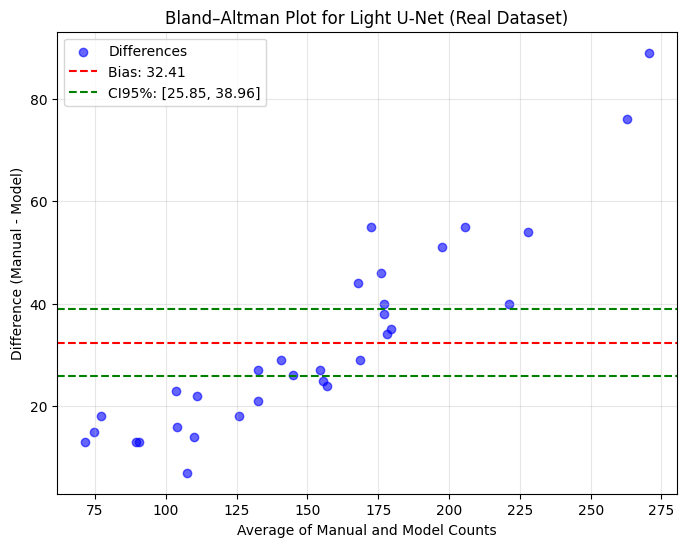

Bias: 32.41
CI95%: [25.85, 38.96]


In [38]:
# Example Usage
# Replace these with your actual data
manual_counts = np.array(ground_truths)  # Replace with real manual counts
model_predictions = np.array(model_lm)  # Replace with model predictions

# Call the function for Bland–Altman analysis
bland_altman_plot(manual_counts, model_predictions, title="Bland–Altman Plot for Light U-Net (Real Dataset)")

In [9]:
data = {
    'Image': list(images_name),
    'operator':list(ground_truths),
    'model_1':list( model_lm)
}
df = pd.DataFrame(data)



In [10]:
# Step 2: Reshape the dataframe into a long format
df_long = pd.melt(
    df,
    id_vars=['Image'],            # Keeps the 'Image' column as is (the targets)
    var_name='Rater',             # Creates a new column to distinguish 'ground_truth' and 'model_1'
    value_name='Score'            # Contains the actual numeric values (manual counts or model predictions)
)

In [12]:
icc = pg.intraclass_corr(data=df_long, targets='Image', raters='Rater', ratings='Score')
print(icc)

    Type              Description       ICC          F  df1  df2  \
0   ICC1   Single raters absolute  0.945497  35.695332   79   80   
1   ICC2     Single random raters  0.945491  35.546489   79   79   
2   ICC3      Single fixed raters  0.945275  35.546489   79   79   
3  ICC1k  Average raters absolute  0.971985  35.695332   79   80   
4  ICC2k    Average random raters  0.971982  35.546489   79   79   
5  ICC3k     Average fixed raters  0.971868  35.546489   79   79   

           pval         CI95%  
0  5.621980e-41  [0.92, 0.96]  
1  1.768316e-40  [0.92, 0.96]  
2  1.768316e-40  [0.92, 0.96]  
3  5.621980e-41  [0.96, 0.98]  
4  1.768316e-40  [0.96, 0.98]  
5  1.768316e-40  [0.96, 0.98]  


In [13]:
icc_file = './ICC_results/icc_best_light_unet_realvssynth.csv'
# Add ICC values into a new DataFrame
icc_results = icc[["Type", "Description", "ICC", "F", "df1", "df2", "pval", "CI95%"]].copy()

# Save to a CSV or Excel file
icc_results.to_csv(icc_file, index=False)

# Print the DataFrame for verification
print("\nICC Results was saved.")
# print(icc_results)


ICC Results was saved.


# light unet synth CCI

In [16]:
images_name= data_local_maxima.iloc[1:,6].dropna()
ground_truths=data_local_maxima.iloc[1:,7].dropna()
#          light-u-net lm cca watershed
model_lm =  data_local_maxima.iloc[1:,10].dropna()


In [17]:
images_name.shape , ground_truths.shape , model_lm.shape 

((32,), (32,), (32,))

In [18]:
data = {
    'Image': list(images_name),
    'operator':list(ground_truths),
    'model_1':list( model_lm) 
}
df = pd.DataFrame(data)



In [23]:

# Now, calculate ICC for each model compared to the operator
# Use a long format, where each row is a single sample/model comparison
df_long = pd.melt(
    df,
    id_vars=['Image'],            # Keeps the 'Image' column as is (the targets)
    var_name='Rater',             # Creates a new column to distinguish 'ground_truth' and 'model_1'
    value_name='Score'            # Contains the actual numeric values (manual counts or model predictions)
)
icc = pg.intraclass_corr(data=df_long, targets='Image', raters='Rater', ratings='Score')
print(icc)


    Type              Description       ICC          F  df1  df2  \
0   ICC1   Single raters absolute  0.785789   8.336605   31   32   
1   ICC2     Single random raters  0.801648  32.882025   31   31   
2   ICC3      Single fixed raters  0.940972  32.882025   31   31   
3  ICC1k  Average raters absolute  0.880047   8.336605   31   32   
4  ICC2k    Average random raters  0.889905  32.882025   31   31   
5  ICC3k     Average fixed raters  0.969588  32.882025   31   31   

           pval          CI95%  
0  2.034298e-08   [0.61, 0.89]  
1  1.959750e-16  [-0.05, 0.95]  
2  1.959750e-16   [0.88, 0.97]  
3  2.034298e-08   [0.76, 0.94]  
4  1.959750e-16  [-0.09, 0.97]  
5  1.959750e-16   [0.94, 0.99]  


In [24]:
# Check if the file exists and append or create a new one
import os
if os.path.exists(icc_file):
    # Load existing results
    icc_existing = pd.read_csv(icc_file)
    # Append new results
    icc_combined = pd.concat([icc_existing, icc], ignore_index=True)
else:
    # If file doesn't exist, start with the new results
    icc_combined = icc_new_results

# Save the combined results back to the file
icc_combined.to_csv(icc_file, index=False)

# Print the combined DataFrame for verification
print("\nUpdated ICC Results DataFrame.")



Updated ICC Results DataFrame.


# unet real

In [25]:
images_name= data_local_maxima.iloc[1:,0].dropna()
ground_truths=data_local_maxima.iloc[1:,1].dropna()
#          u-net lm cca watershed
model_lm =  data_local_maxima.iloc[1:,2].dropna()


In [26]:
images_name.shape , ground_truths.shape , model_lm.shape 

((80,), (80,), (80,))

In [27]:
data = {
    'Image': list(images_name),
    'operator':list(ground_truths),
    'model_1':list( model_lm) ,
}
df = pd.DataFrame(data)



In [28]:

# Now, calculate ICC for each model compared to the operator
# Use a long format, where each row is a single sample/model comparison
df_long = pd.melt(
    df,
    id_vars=['Image'],            # Keeps the 'Image' column as is (the targets)
    var_name='Rater',             # Creates a new column to distinguish 'ground_truth' and 'model_1'
    value_name='Score'            # Contains the actual numeric values (manual counts or model predictions)
)
icc = pg.intraclass_corr(data=df_long, targets='Image', raters='Rater', ratings='Score')
print(icc)



    Type              Description       ICC          F  df1  df2  \
0   ICC1   Single raters absolute  0.811091   9.587121   79   80   
1   ICC2     Single random raters  0.820960  23.021915   79   79   
2   ICC3      Single fixed raters  0.916743  23.021915   79   79   
3  ICC1k  Average raters absolute  0.895693   9.587121   79   80   
4  ICC2k    Average random raters  0.901678  23.021915   79   79   
5  ICC3k     Average fixed raters  0.956563  23.021915   79   79   

           pval         CI95%  
0  1.414661e-20  [0.72, 0.87]  
1  1.604785e-33  [0.14, 0.94]  
2  1.604785e-33  [0.87, 0.95]  
3  1.414661e-20  [0.84, 0.93]  
4  1.604785e-33  [0.25, 0.97]  
5  1.604785e-33  [0.93, 0.97]  


In [29]:
icc_file = './ICC_results/icc_best_unet_realvssynth.csv'
# Add ICC values into a new DataFrame
icc_results = icc[["Type", "Description", "ICC", "F", "df1", "df2", "pval", "CI95%"]].copy()

# Save to a CSV or Excel file
icc_results.to_csv(icc_file, index=False)

# Print the DataFrame for verification
print("\nICC Results was saved.")
# print(icc_results)


ICC Results was saved.


# unet synth

In [30]:
images_name= data_local_maxima.iloc[1:,6].dropna()
ground_truths=data_local_maxima.iloc[1:,7].dropna()
#          light-u-net lm cca watershed
model_lm =  data_local_maxima.iloc[1:,8].dropna()


In [31]:
images_name.shape , ground_truths.shape , model_lm.shape 

((32,), (32,), (32,))

In [32]:
data = {
    'Image': list(images_name),
    'operator':list(ground_truths),
    'model_1':list( model_lm) 
}
df = pd.DataFrame(data)



In [33]:
df_long = pd.melt(
    df,
    id_vars=['Image'],            # Keeps the 'Image' column as is (the targets)
    var_name='Rater',             # Creates a new column to distinguish 'ground_truth' and 'model_1'
    value_name='Score'            # Contains the actual numeric values (manual counts or model predictions)
)

In [34]:
icc = pg.intraclass_corr(data=df_long, targets='Image', raters='Rater', ratings='Score')
print(icc)

    Type              Description       ICC          F  df1  df2  \
0   ICC1   Single raters absolute  0.770692   7.721875   31   32   
1   ICC2     Single random raters  0.788713  30.153089   31   31   
2   ICC3      Single fixed raters  0.935801  30.153089   31   31   
3  ICC1k  Average raters absolute  0.870498   7.721875   31   32   
4  ICC2k    Average random raters  0.881877  30.153089   31   31   
5  ICC3k     Average fixed raters  0.966836  30.153089   31   31   

           pval          CI95%  
0  5.357636e-08   [0.58, 0.88]  
1  6.945973e-16  [-0.05, 0.94]  
2  6.945973e-16   [0.87, 0.97]  
3  5.357636e-08   [0.74, 0.94]  
4  6.945973e-16   [-0.1, 0.97]  
5  6.945973e-16   [0.93, 0.98]  


In [35]:
# Check if the file exists and append or create a new one
import os
if os.path.exists(icc_file):
    # Load existing results
    icc_existing = pd.read_csv(icc_file)
    # Append new results
    icc_combined = pd.concat([icc_existing, icc], ignore_index=True)
else:
    # If file doesn't exist, start with the new results
    icc_combined = icc_new_results

# Save the combined results back to the file
icc_combined.to_csv(icc_file, index=False)

# Print the combined DataFrame for verification
print("\nUpdated ICC Results DataFrame.")



Updated ICC Results DataFrame.
